# Delivery_time -> Predict delivery time using sorting time

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
#importing csv file
df=pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#renaming columns
df_1=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df_1.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


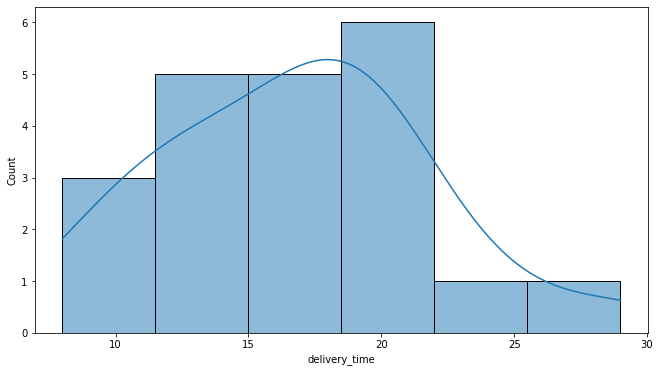

In [5]:
#distance plot for delivery_time
plt.figure(figsize=(11,6))
sns.histplot(df_1['delivery_time'],kde=True);

*Above kde indicate that data is more concentrated at the left side of the curve and less concentrated at the right side of the curve can also be called psotively skewed.The averaverage delivery time taken is distributed approximately between 10-23 and lowest delivery time taken is approximately between 23-29. the most frequent delivery time taken is distributed between 18-23.

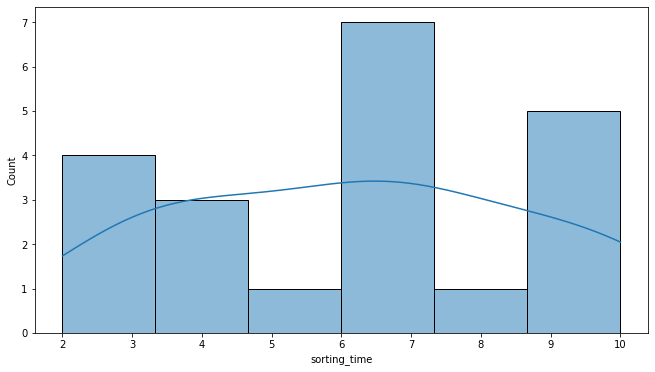

In [6]:
#distance plot for sorting_time
plt.figure(figsize=(11,6))
sns.histplot(df_1['sorting_time'],kde=True);

*Data of sorting time shows the diversity in the data and because of that is shows flatter peak can also be called platykurtic.
the most frequent sorting time taken is ranges between 6-7.2 and the lowest time taken to sort is ranges between 4.8-6 and 7.2-8.2.By looking at the histogram we say that varies alot because ther has no definite pattern to the histogram.

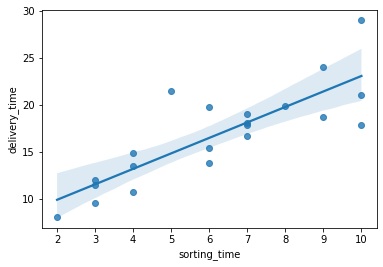

In [7]:
#regression plot 
sns.regplot(x='sorting_time',y='delivery_time',data=df_1);

*from the above regression plot it is clear that the linear relationship between the depedent variable and independent variable is not that strong as moost of data points are far from the regression line.So we use some transformation on both variable.Also we can see the presence of outliers at top most right. 

In [8]:
# creeating log-transforme data
data_log = np.log(df_1)

Text(0.5, 1.0, 'Log-tranformed data')

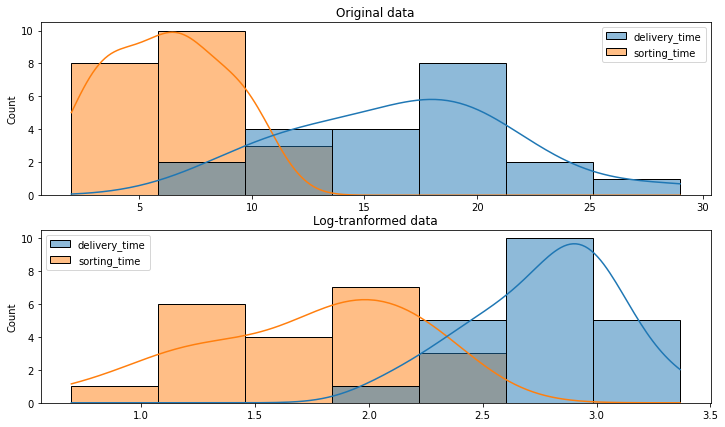

In [9]:
plt.figure(figsize=(12,7))
#histogram of normal data
plt.subplot(2,1,1)
sns.histplot(df_1,kde=True)
plt.title('Original data')

#plotting log-tranformed data
plt.subplot(2,1,2)
sns.histplot(data_log,kde=True)
plt.title('Log-tranformed data')

*Notice that how log transformed data is more normally dstributed compared to the original distribution.Now we see that ranges of x-axes are compressed and the distribution of sorting have changed to more like normal curve with skewed on right side of the data that means more sorting time denser on the left side of the data.For the delivery time,its distribution changes to more dense in the middle and left skewed (tail elongated on the left side of the curve). 

Text(0.5, 1.0, 'Square root transformed data')

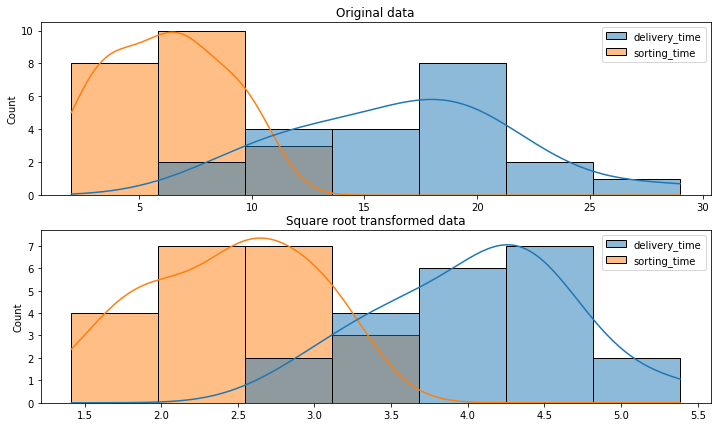

In [10]:
#square root tranformation
data_sq = np.sqrt(df_1)

plt.figure(figsize=(12,7))
#plotting histogram
plt.subplot(2,1,1)
sns.histplot(df_1,kde=True)
plt.title('Original data')

plt.subplot(2,1,2)
sns.histplot(data_sq,kde=True)
plt.title('Square root transformed data')

*The above squre root transformed data is more like normally distributed data as compared to the original data.In sqrt tranformation,diversity of sorting time has reduced and most of the sorting time has distributed between 2-3.2.In the distribution of delivery time,the left tail of the delivery time is less elongated towards left side than log_tranformed data.less diversity in sorting time implies good results in predecting delivery time.

Text(0.5, 1.0, 'Cube root transformed data')

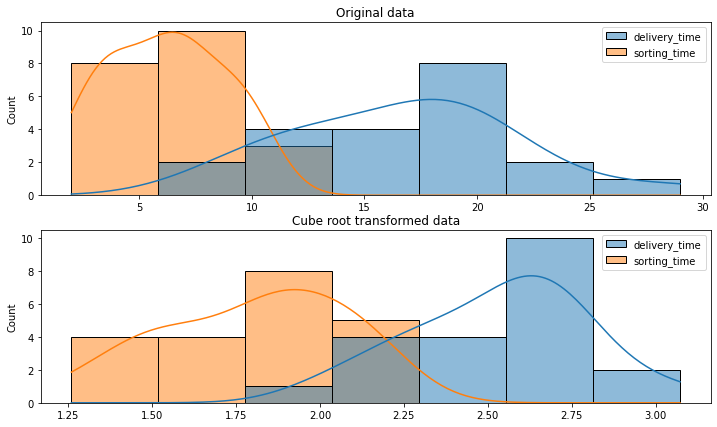

In [11]:
#Cube-square root transformation
data_cb = np.cbrt(df_1)

plt.figure(figsize=(12,7))
#plotting histogram
plt.subplot(2,1,1)
sns.histplot(df_1,kde=True)
plt.title('Original data')

plt.subplot(2,1,2)
sns.histplot(data_cb,kde=True)
plt.title('Cube root transformed data')

*Due to cube root transformation,the sorting time distribution's curve became flatter and slightly right skewed means most of the data dense on the left side od the data.here due to cbrt tranformation,mode of sorting came into see which lies betweem 1.76-2.1.For delivery time,mode is shifted to the right hand side of curve and also tail of curve of delivery time is elongated towards left side implies presence of outliers.

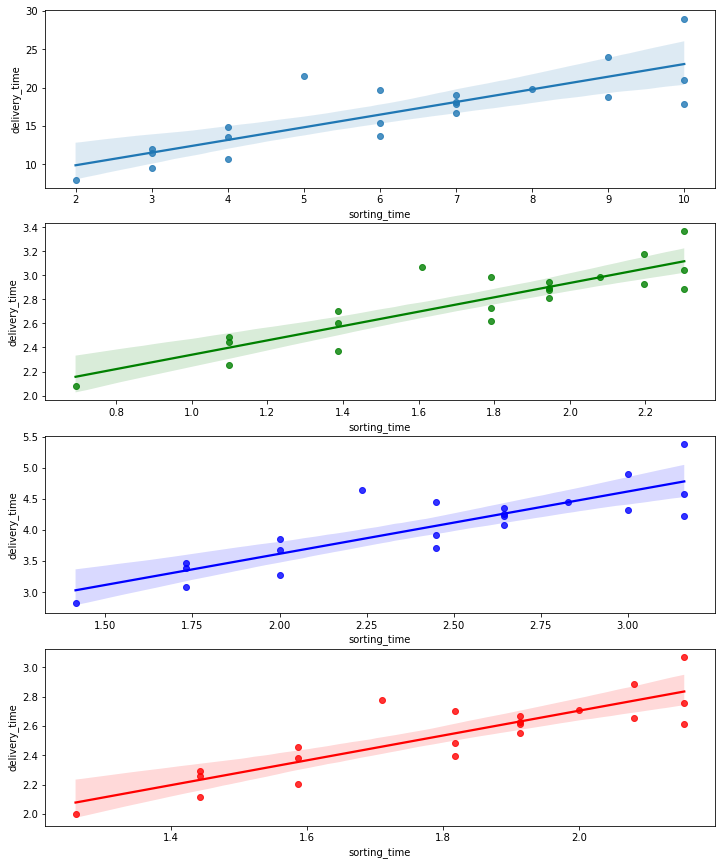

In [12]:
#regression plot of transformed data
plt.figure(figsize=(12,15))
#original data
plt.subplot(4,1,1)
sns.regplot(x='sorting_time',y='delivery_time',data=df_1);
#log-transformed
plt.subplot(4,1,2) 
sns.regplot(x='sorting_time',y='delivery_time',data=data_log,color='g');

#sqrt-transformed
plt.subplot(4,1,3)
sns.regplot(x='sorting_time',y='delivery_time',data=data_sq,color='b');

#cbrt-transformed
plt.subplot(4,1,4)
sns.regplot(x='sorting_time',y='delivery_time',data=data_cb,color='r');

*From the above graph we can see the result of transformations by compairing regression plot of original data set with transformed data sets.data points of transformed data sets are more closer to the regression line than original data, signifies good relationship but the presence of outliers is still there from this we can concluded that there is no impact of transformation on outliers.

In [13]:
#correlation between x & y
print('correlation of original data')
print(df_1.corr())
print('********************')

print('correlation of log tranformed data')
print(data_log.corr())
print('********************')

print('correlation of square root transformed data')
print(data_sq.corr())
print('********************')

print('correlation of cube root transformed data')
print(data_cb.corr())
print('********************')

correlation of original data
               delivery_time  sorting_time
delivery_time       1.000000      0.825997
sorting_time        0.825997      1.000000
********************
correlation of log tranformed data
               delivery_time  sorting_time
delivery_time       1.000000      0.878727
sorting_time        0.878727      1.000000
********************
correlation of square root transformed data
               delivery_time  sorting_time
delivery_time       1.000000      0.853933
sorting_time        0.853933      1.000000
********************
correlation of cube root transformed data
               delivery_time  sorting_time
delivery_time       1.000000      0.862622
sorting_time        0.862622      1.000000
********************


In [14]:
#model_org building 
model_org=smf.ols("delivery_time~sorting_time",data=df_1).fit()

# coefficient parameters
print('parameters:',model_org.params)
print('**************************')

#t-value and p-value
print('t-value:',model_org.tvalues,'\n','p-value:',model_org.pvalues)
print("**************************")

#R^2 value
print('R^2 value:',model_org.rsquared,'R^2-adj:',model_org.rsquared_adj)

parameters: Intercept       6.582734
sorting_time    1.649020
dtype: float64
**************************
t-value: Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 p-value: Intercept       0.001147
sorting_time    0.000004
dtype: float64
**************************
R^2 value: 0.6822714748417231 R^2-adj: 0.6655489208860244


In [15]:
#model_log
model_log = smf.ols("delivery_time~sorting_time",data=data_log).fit()

# coefficient parameters
print('parameters:',model_log.params)
print('**************************')

#t-value and p-value
print('t-value:',model_log.tvalues,'\n','p-value:',model_log.pvalues)
print("**************************")

#R^2 value
print('R^2 value:',model_log.rsquared,'R^2-adj:',model_log.rsquared_adj)

parameters: Intercept       1.741987
sorting_time    0.597522
dtype: float64
**************************
t-value: Intercept       13.085552
sorting_time     8.024484
dtype: float64 
 p-value: Intercept       5.921137e-11
sorting_time    1.601539e-07
dtype: float64
**************************
R^2 value: 0.77216134926874 R^2-adj: 0.7601698413355158


In [16]:
#model_sqrt
model_sqrt = smf.ols("delivery_time~sorting_time",data=data_sq).fit()

# coefficient parameters
print('parameters:',model_sqrt.params)
print('**************************')

#t-value and p-value
print('t-value:',model_sqrt.tvalues,'\n','p-value:',model_sqrt.pvalues)
print("**************************")

#R^2 value
print('R^2 value:',model_sqrt.rsquared,'R^2-adj:',model_sqrt.rsquared_adj)

parameters: Intercept       1.613479
sorting_time    1.002217
dtype: float64
**************************
t-value: Intercept       4.628248
sorting_time    7.152817
dtype: float64 
 p-value: Intercept       1.833621e-04
sorting_time    8.475706e-07
dtype: float64
**************************
R^2 value: 0.7292011987544664 R^2-adj: 0.7149486302678594


In [17]:
#model_cbrt
model_cbrt = smf.ols("delivery_time~sorting_time",data=data_cb).fit()

# coefficient parameters
print('parameters:',model_cbrt.params)
print('**************************')

#t-value and p-value
print('t-value:',model_cbrt.tvalues,'\n','p-value:',model_cbrt.pvalues)
print("**************************")

#R^2 value
print('R^2 value:',model_cbrt.rsquared,'R^2-adj:',model_cbrt.rsquared_adj)

parameters: Intercept       1.013571
sorting_time    0.845585
dtype: float64
**************************
t-value: Intercept       4.900067
sorting_time    7.433210
dtype: float64 
 p-value: Intercept       9.941770e-05
sorting_time    4.904127e-07
dtype: float64
**************************
R^2 value: 0.7441167577566271 R^2-adj: 0.7306492186911864


In [18]:
#define dependent variable 
y=df_1['delivery_time']

#define independent variable
x=df_1['sorting_time']

## Using model based on log-transformation as it has highest r^2 and r^2 adj value.

# predicting for new data points

In [19]:
# predicting delivery time for sorted time= 14 and 3
sorted_time=pd.Series([14,3])
data_pred=pd.DataFrame(sorted_time,columns=['sorting_time'])

In [20]:
model_log.predict(data_pred)

0    10.107300
1     3.534554
dtype: float64

In [21]:
#predicting on given data
preds = x[:3]

In [22]:
preds

0    10
1     4
2     6
Name: sorting_time, dtype: int64

In [23]:
predict_val = model_log.predict(preds)

In [24]:
predict_val

0    7.717210
1    4.132076
2    5.327121
dtype: float64

In [37]:
actual_val = y[:3]
actual_val

0    21.00
1    13.50
2    19.75
Name: delivery_time, dtype: float64

In [26]:
#calculating rmse 
mse_log = mean_squared_error(actual_val,predict_val)

In [27]:
rmse_log = np.sqrt(mse_log)
print('rmse_log-',rmse_log)

rmse_log- 12.546047579943663


In [28]:
#predicting using other model an caculationg rmse(root mean square error).

In [29]:
#predicting using original model
predict_val1 = model_org.predict(preds)

In [30]:
#calculating mse
mse_org = mean_squared_error(actual_val,predict_val1)

In [31]:
#calculating rmse
rmse_org = np.sqrt(mse_org)

In [32]:
print('rmse_org:',rmse_org)

rmse_org: 2.2445267264737008


In [33]:
# for model_sqrt
predict_val2 = model_sqrt.predict(preds)

#calculating mse
mse_sqrt = mean_squared_error(actual_val,predict_val2)

#calculating rmse
rmse_sqrt = np.sqrt(mse_sqrt)
print('rmse_sqrt:',rmse_sqrt)

rmse_sqrt: 9.945199700341211


In [34]:
# for model_cbrt
predict_val3 = model_sqrt.predict(preds)

#calculating mse
mse_cbrt = mean_squared_error(actual_val,predict_val3)

#calculating rmse
rmse_cbrt = np.sqrt(mse_cbrt)
print('rmse_cbrt:',rmse_cbrt)

rmse_cbrt: 9.945199700341211


In [35]:
rmse_data = pd.DataFrame({'model_log':rmse_log,
                          'model_org':rmse_org,
                          'model_sqrt':rmse_sqrt,
                          'model_cbrt':rmse_cbrt},
                         index=[1])
rmse_data

,model_log,model_org,model_sqrt,model_cbrt
1,12.546048,2.244527,9.9452,9.9452


In [39]:
#predicting using model_org
input_df = x[3:6]
input_df

3     9
4    10
5     6
Name: sorting_time, dtype: int64

In [41]:
pred_ = model_org.predict(input_df)
pred_

3    21.423913
4    23.072933
5    16.476853
dtype: float64

In [42]:
actual_df = y[3:6]
actual_df

3    24.00
4    29.00
5    15.35
Name: delivery_time, dtype: float64

From the above result we see that model_org has least rsme score then our final model should be model_org because it predecting with lowest error.

In [36]:
#summry of model_org
print(model_org.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        11:10:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

### The regreesion equation, y =  6.6 + 1.65(x) can be interpreted as each additional unit increases in sorting time is associated with 1.65 times average increase in delivery time.